In [ ]:
# Aproximación de áreas por medio de elipses
## BNF
Para que el código funcione es necesario darle la dirección del archivo prueba0.txt y señalar los límites dode se quiere trabajar,es un código en progreso y es una primera aproximación.

El método que se utiliza es una curva de mejor ajuste por mínimos cuadrados con el método creado por Halir, R.; Flusser, J. “Numerically stable direct least squares fitting of ellipses”. In Proc. 6th International Conference in Central Europe on Computer Graphics and Visualization. WSCG (Vol. 98, pp. 125-132). y que forma parte de la librería skimage, paquete incluido en anaconda.

center =  (0.2475357935306957, 3.289787524720755e-06)
angle of rotation =  0.0002485400708353978
axes =  (0.05289207367576889, 0.029489722230869944)
Área =  0.004900170018635636


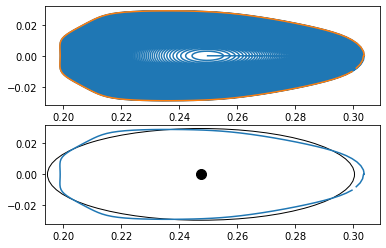

In [3]:
#Creado por Bryam Núñez Flores, última fecha de modificación lunes 12 de octubre 14:25
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

#Se define una función para extraer los datos del .txt
def LeerDatos(archivo):
    datos = np.loadtxt(archivo, usecols=(0, 1), skiprows=0)
    #Se descarta la tercera columna y no brinca filas 
    return datos

# Se define una función que cree numpy arrays en base a los datos extraídos previamente 
def GraficasDeContorno(archivo, lim_inferior, lim_superior):
    # Es necesario establecer los límites para determinar cual superficie de contorno se quiere extraer
    datos = LeerDatos(archivo)
    n, _ = datos.shape
    r = datos[:, 0]
    z = datos[:, 1]
    # tanto r y z son arrays que contiene TODOS los datos un array tiene todo lo que corresponde a r y el otro a z 
    delta = lim_superior-lim_inferior
    x = np.zeros(delta)
    y = np.zeros(delta)
    points = np.zeros((delta, 2))
    for j in range(lim_inferior, lim_superior):
        x[j-lim_inferior] = datos[j][0]
        y[j-lim_inferior] = datos[j][1]
        points[j-lim_inferior] = datos[j]
    # el proceso anterior permite crear un array que contiene solo los datos de la superfice deseada
    return points, x, y, r, z

# Esta función utiliza mínimos cuadrados para determinar los parámetros de la elipse que mejor se ajusta a los datos 
# También contiene el código que genera las gráficas de los resultados.
def ellipse(points, x, y, r, z):
    ell = EllipseModel()
    ell.estimate(points)

    xc, yc, a, b, theta = ell.params
    area = np.pi*a*b
    #EllipseModel es la función que realiza el ajuste y probiene de la biblioteca skimage.measure
    # Se considera un método muy robusto
    # A su vez se sabe que el área de un elipse es pi*a*b por lo tanto se calcula inmediatamente
    
    print("center = ",  (xc, yc))
    print("angle of rotation = ",  theta)
    print("axes = ", (a, b))
    print("Área = ", area)

    fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
    axs[0].plot(r, z)
    axs[0].plot(x, y)

    axs[1].plot(x, y)
    axs[1].scatter(xc, yc, color='black', s=100)
    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='black', facecolor='none')

    axs[1].add_patch(ell_patch)
    plt.show()
    #por último se realizan las gráficas para presentar los resultados

#MUY MUY importante en archivo hay que colocar la ruta donde se encuntra el documento prueba0.txt
#esto varía dependiendo del usuario 
archivo = '/home/bnf/Escritorio/Repositorios/plasmatec/Cálculo de errores/prueba0.txt'
# En lim_inferior y superior se establecen las líneas donde están los datos de la superficie específica a analizar
lim_inferior = 9894
lim_superior = 9995
points, x, y, r, z = GraficasDeContorno(archivo, lim_inferior, lim_superior)
ellipse(points, x, y, r, z)
#Finalizando el código permite analizar tdoas las superficies menos la última (la más externa)